# **Farmworkers in the United States During and After the Bracero Program**

### Kylie Miller

#### *May 15, 2025 -- Final Project for CU Denver's HIST 5261, "Working With Data"*

## Introduction

In the wake of World War II, people in the United States suddenly had an abundance of employment opportunities. With men joining the military to fight overseas and the creation of many new industrial jobs to support the war effort, the United States workforce was facing an unusual problem of not having enough workers, particularly in agriculture. The United States government found a willing partner to address this problem in the Mexican government, which was eager to boost its economy by providing work for its unemployed citizens. These simultaneous desires led to an agreement between the two nations that would become known as the Bracero Program, lasting from 1942 until its termination long after the end of World War II in 1964.

<div align="center">
  <img
    src="../assets/img/braceros.jpg"
    width="60%"
    style="border: 2px solid"
    alt="Mexican Braceros topping sugar beets in California, 1943"
  />
  <figcaption style="font-style: italic">
    Mexican Bracero workers in California topping sugar beets, 1943.
      Photo by Marjory Collins, located in the Library of Congress (https://www.loc.gov/resource/fsa.8d29109/)
  </figcaption>
</div>


The Bracero Program - a term that comes from the Spanish word "brazo" meaning "arm" in reference to manual labor - was a temporary work program that would bring Mexican men to the United States under work contracts for periods between six weeks and six months before returning back to Mexico. After going through a screening and documentation process with the Mexican government, the United States would provide transportation, temporary housing, and food for the Bracero workers in addition to their temporary jobs. Other than the initial years of the program when some Braceros worked on railroads, Braceros came to work on farms in most states throughout the United States, shown in the map below.

<div align="center">
  <img
    src="../assets/img/bracero-map.jpg"
    width="65%"
    style="border: 2px solid"
    alt="Map of Bracero Distribution in the United States: 1942-1964"
  />
</div>


By 1964, the United States government ended the Bracero Program, partly because people in the United States worried about the impact of Braceros on domestic labor. Those pushing to end the program particularly focused on the idea that the program took away jobs from citizens in the United States and overall lowered wages of farmworkers. Over twenty years of such a program brings up questions related to the extent to which farms became dependent on Bracero labor and therefore the impact that ending the program had on farms. Specifically, **how effective was ending the Bracero program in achieving goals of supporting local labor?** This project will explore this question by looking at data related to farmworker employment between 1942 and 1974, particularly exploring changes in 1964 at the termination of the program. 

The 2018 economic study by Michael Clemens et. al where this data originated explored a similar question. Specifically, the study pushed claims by government officials and others who touted the success of ending the Bracero Program in its positive impacts on domestic labor, noting that these claims often did not have robust data to back them up. After gathering and analyzing a large set of data regarding farmworkers and Bracero workers, Clemens concluded that "*bracero* exclusion failed to substantially raise wages or employment for domestic workers" (1485), arguing that the reason for this was an adjustment to production levels as well as more rapid adoption of mechanization. A 2023 study by Shmuel San adds to this by arguing that ending the Bracero Program "induced a sharp increase in innovation in technologies" (138), showing that instead of replacing Braceros with domestic labor, farmers adjusted through adopting new technologies. 

Of course, relying on data reduces the story of the Bracero Program to numbers without exploring the impact the program had on people and their lives. Much of the scholarship concerning the Bracero Program does focus on these more human stories, even interviewing and using the stories of ex-Braceros themselves to highlight different aspects of the program. For instance, Ronald Mize's book *The Invisible Workers of the U.S.-Mexico Bracero Program* utlizies interviews to detail the experiences of Bracero workers, often highlighting mistreatment and discrimination. In *Defiant Braceros*, Mireya Loza outlines similar injustices that Bracero workers faced but also expands the story to detail ways in which Braceros fought back against this mistreatment and discrimination. Deborah Cohen also highlights the Bracero experience in her book *Braceros: Migrant Citizens and Transnational Subjects,* again utilizing sources like interviews to highlight Bracero agency as well as the complexity and nuances touching everyone involved in the Bracero system. While my work with data does not feature such stories, it is important to recognize that these human features would be essential for a complete telling of the Bracero Program.

Using the same data as the Clemens study, my analysis relies less on complex economic modeling and more on data visualization to arrive at a similar conclusion regarding the question of how effectively ending the Bracero program acheived its goals of supporting local labor. Looking at the story through numbers, ending the Bracero Program did not cause a significant improvement for domestic labor. In general, the number of farmworkers in the United States was decreasing even before the end of the Bracero Program, a pattern that generally continued for domestic laborers even after excluding Braceros. That said, my analysis also reveals the limitations of solely relying on such a dataset for the entirety of an analysis. Even though the Clemens research team created an extensive dataset, my analysis still reveals holes and complications that provide challenges for analysis, indicating the importance of other sources in addition to numbers to tell a full story. 

## Methods/Data

The [dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/17M4ZP) for this project comes from the Harvard Dataverse and was created for the 2018 study "Immigration Restrictions as Active Labor Market Policy: Evidence from the Mexican Bracero Exclusion" by Michael Clemens et. al. Most data comes from the "bracero_aer_dataset", where the research team compiled a significant amount of the data from "Farm Labor Reports" from the United States Department of Agrigulture. They also used some supplemental state data reports and reports from the United States Department of Labor. ([PDFs for the sources of this data can be found by clicking here.](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DJHVHB)) As with all data, especially that collected at a large national scale, one should keep in mind various inaccuracies that could arise, including varying data collection methods over the years and relying on farm owners to accurately report their numbers. 

<div align="center">
  <img
    src="../assets/img/pdfexample.png"
    width="50%"
    style="border: 2px solid"
    alt="Example of page from PDF to gather data"
  />
  <figcaption style="font-style: italic">
    Page from September 14, 1944 United States Department of Agriculture Farm Labor Report
  </figcaption>
</div>


I also utilized the "total_braceros_by_year" dataset, which not only showed the total number of contracted Braceros between 1942 and 1980 but also the number of "apprehensions" of unauthorized Mexicans in the United States each year. This data occurs in much of the literature related to the Bracero Program, meaning it is likely easily accessible government data. As I will discuss later, while many scholars use the number of apprehensions as an indication of unauthorized immigrants in the United States, it is important to remember that this number comes from the number of unauthorized immigrants caught by government officials, numbers that would change not only with changing numbers of unauthorized immigrants but also with respect to the effort officials put into making such apprehensions.

### Selecting Useful Data

The original "bracero_aer_dataset" compiled included about 80 columns of information one could work with, including data related to crops and wages. 

In [30]:
import pandas as pd
bracero_df_og = pd.read_csv('../data/original/bracero_aer_dataset.tab', sep='\t')
bracero_df_og.columns

Index(['State', 'State_FIPS', 'Region', 'Year', 'Month', 'DailywoBoard_final',
       'HourlyComposite_final', 'MonthlyComposite_final',
       'TotalHiredSeasonal_final', 'Mexican_final',
       'HiredWorkersonFarms_final', 'Local_final', 'Intrastate_final',
       'Interstate_final', 'TotalForeign_final', 'Jamaican_final',
       'Bahamian_final', 'BWIOthers_final', 'BWI_final', 'Canadian_final',
       'CanadianOthers_final', 'PuertoRican_final', 'OtherForeign_final',
       'TotalAg_final', 'Nonlocal_final', 'Farmworkers_Total',
       'Farmworkers_Family', 'Farmworkers_Hired', 'Petroleum', 'Tractors',
       'Cotton_machine', 'Sugarbeet_machine', 'Sugarbeet_monogerm',
       'SugarBeets', 'Cotton', 'Tomatoes_total', 'Lettuce',
       'Strawberries_total', 'Citrus', 'Cantaloupes', 'BrusselsSprouts',
       'Asparagus_total', 'Celery', 'Cucumbers_pickle', 'Tomatoes_fresh',
       'Tomatoes_proc', 'Strawberries_fresh', 'Strawberries_proc',
       'Asparagus_fresh', 'Asparagus_proc', 

Since I was only interested in the data concerning farmworker populations, I created new dataframes and csv files with only the data relevant to my project. This also required using more [details about the columns](https://dataverse.harvard.edu/dataverse-data-explorer-v2/?fileId=3240617&fileMetadataId=2524735&dvLocale=en&siteUrl=https://dataverse.harvard.edu), as it was not helpful for me to use columns of data only addressing a few years like the Jamaican_final column, which only had data from 1943-1947.

In [32]:
##Original cutting out columns
farmworkers_df_og = bracero_df_og[['State','Year','Month', 'Region', 'TotalHiredSeasonal_final','Mexican_final','HiredWorkersonFarms_final',
              'Local_final','Intrastate_final','Interstate_final','TotalForeign_final','Jamaican_final','Bahamian_final',
              'BWIOthers_final','BWI_final','Canadian_final','CanadianOthers_final','PuertoRican_final', 'TotalAg_final','Nonlocal_final','Farmworkers_Total','Farmworkers_Family','Farmworkers_Hired']]

##Renaming columns to take up less space (mainly taking out "final")
farmworkers_df_og = farmworkers_df_og.rename(columns={'TotalHiredSeasonal_final': 'TotalHiredSeasonal', 
                                               'Mexican_final': 'Mexican', 'HiredWorkersonFarms_final': 'HiredWorkers',
                                               'Local_final': 'Local', 'Intrastate_final': 'Intrastate', 'Interstate_final': 'Interstate',
                                               'TotalForeign_final': 'TotalForeign', 'Jamaican_final': 'Jamaican', 'Bahamian_final': 'Bahamian',
                                               'BWIOthers_final': 'BWIOthers', 'BWI_final': 'BWI', 'Canadian_final': 'Canadian', 'CanadianOthers_final': 'CanaidanOthers',
                                               'PuertoRican_final': 'PuertoRican', 'OtherForeign_final': 'OtherForeign', 'TotalAg_final': 'TotalAgWorkers',
                                               'Nonlocal_final': 'Nonlocal'})

##Realizing many of my initial categories were irrelevant
farmworkers_df = farmworkers_df_og[['State','Year','Month', 'Region', 'TotalHiredSeasonal','Mexican','HiredWorkers',
              'Local','Intrastate','Interstate','TotalForeign']]

farmworkers_df.sample(5)

,State,Year,Month,Region,TotalHiredSeasonal,Mexican,HiredWorkers,Local,Intrastate,Interstate,TotalForeign
10207,NC,1960,6.0,5.0,60230.0,0.0,NaN,52721.0,2500.0,5009.0,0.0
9666,NY,1956,6.0,2.0,14441.0,0.0,NaN,6625.0,600.0,3389.0,208.0
4499,KS,1973,10.0,4.0,NaN,NaN,154000.0,NaN,NaN,NaN,NaN
10616,OH,1957,1.0,3.0,NaN,NaN,99000.0,NaN,NaN,NaN,NaN
15708,WY,1947,3.0,8.0,NaN,4.0,NaN,NaN,NaN,NaN,4.0


This is the additional context related to some of the columns in this file that the Clemens et. al team provided for each of the columns I used. However, it is also important to note that while these descriptions provide a year range, not all states had reported data for all years within this range.

- 'TotalHiredSeasonal' = "Total Hired Seasonal Workers (Local+Intra+Inter+Foreign, 1953-1973)"
- 'Mexican' = "Mexican (contract workers only, 1943-1967)" *(this means that this only counts Mexican workers with contracts through the Bracero Program, not any unauthorized workers)*
- 'HiredWorkers' = "Hired Workers on Farms (total, quarterly 1942-1974)"
- 'Local' = "Local (nonmigratory domestic, 1948-1973)"
- 'Intrastate' = "Intrastate (1948-1973)"
- 'Interstate = "Interstate (1948-1973)"
- 'TotalForeign' = "Total Foreign Workers (as reported, 1945-1948, 1950-1973)"

### Analyzing Data by State and Year

In exploring the dataset, I noticed that much of the data was reported multiple times a year, noted by the month the data came from. However, not all states had the same number of entries, indicating that some states had more thorough data than others (notably California).

<Axes: title={'center': 'Number of Data Entries by State'}, xlabel='State', ylabel='Entries'>

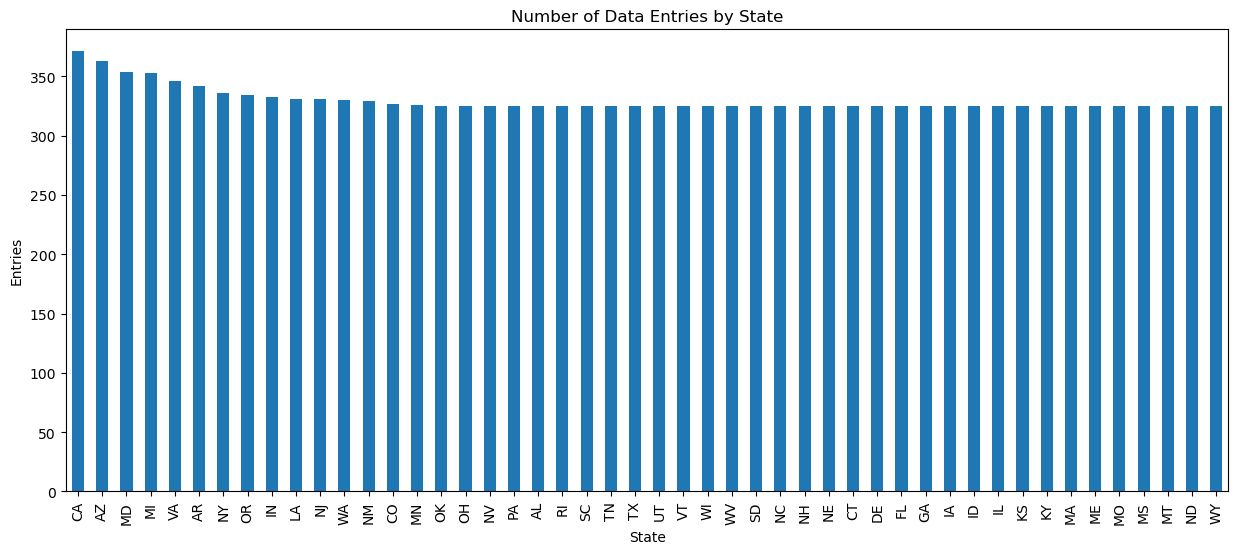

In [88]:
farmworkers_df.value_counts('State').plot(kind='bar', title='Number of Data Entries by State', ylabel='Entries', figsize=(15, 6))

In order to avoid misrepresenting the data by overcounting places like California, I often decided to normalize each state's data by compiling numbers for a category for a specific year and taking the average of these numbers to represent the year's farmworker population. Below is an example of how I did this with the "TotalHiredSeasonal" category, but I applied this strategy to each category for the analysis.

In [37]:
##Many months of data were only targeting certain categories, creating a lot of "NaN" data. 
#The first step was therefore to isolate the parts of the data with values
seasonal_df = farmworkers_df[farmworkers_df['TotalHiredSeasonal'].notna()]

##Then, I could group by the state and year to create a new dataframe with the year's averages
seasonal_year = seasonal_df.groupby(['State', 'Year'])['TotalHiredSeasonal'].mean().reset_index()

## Main Analysis

### Worker Changes After 1964

As this project aims to explore changes correlating with the end of the Bracero Program, it is initially helpful to look at how the overall trends in the industry of farmworkers. The following therefore uses the data from the "HiredWorkers" category, a category that looks at all workers on farms, not just seasonal workers.

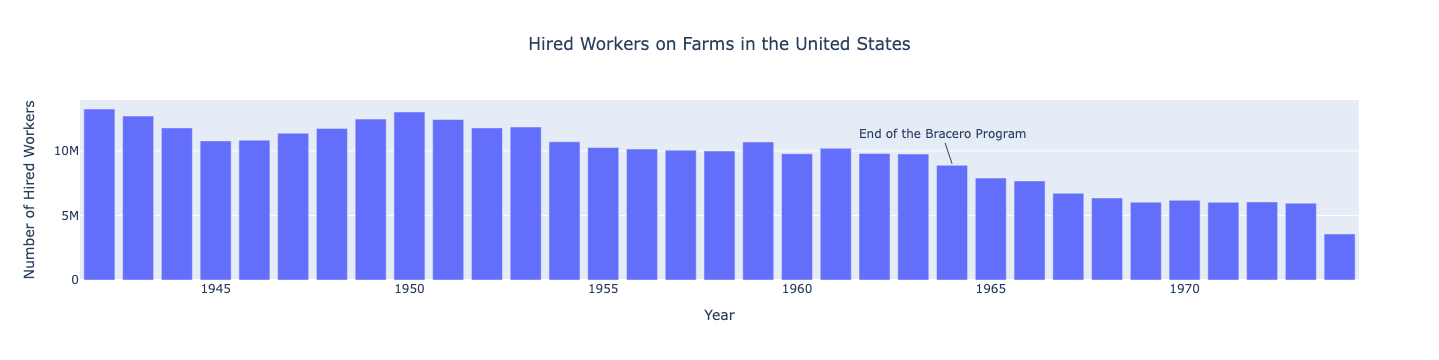

In [261]:
hired_df = farmworkers_df[farmworkers_df['HiredWorkers'].notna()]
hired_year = hired_df.groupby(['State', 'Year'])['HiredWorkers'].mean().reset_index()
hired_year = hired_year.groupby('Year')['HiredWorkers'].sum().reset_index()

import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
pio.renderers.default = "jupyterlab"
pyo.init_notebook_mode(connected=True)

hiredfig = px.bar(hired_year, x='Year', y='HiredWorkers', title="Hired Workers on Farms in the United States",
                 labels={'HiredWorkers': 'Number of Hired Workers'})

hiredfig.update_layout(title={'x':0.5, 'xanchor': 'center'})

#add annotation to symbolize end of the bracero program
hiredfig.add_annotation(x=1964, y=9000000, text='End of the Bracero Program', showarrow=True)

hiredfig.show()

The overall trend in the United States shows that the number of hired workers on farms decreased gradually, though relatively consistently, starting around 1950. This trend began long before the end of the Bracero Program in 1964, after which numbers of hired workers on farms continued to drop. However, this drop after 1964 was not as drastic as one may with what Clemens et. al described as a "large reduction in labor supply" (1468) when farmers were no longer able to hire Mexican Bracero workers. Either way, this reveals that throughout the United States, the general hiring of farmworkers was already trending downward starting in the middle of the century.

However, as the Bracero Program was specifically for temporary workers, it is possible that ending the program would show the expected drastic impact on seasonally hired farmworkers, something explored in the chart below. Seasonal workers included Mexicans hired through the Bracero program, but also included domestic and other foreign workers who worked less than 150 days out of the year.

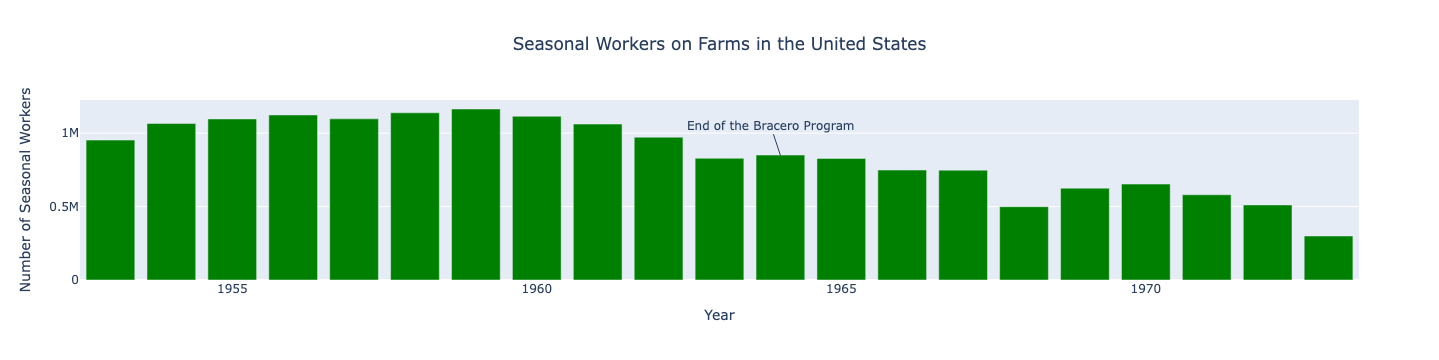

In [213]:
##An extra step because there was a weird outlier of some data in 1948 despite the data being only from 1953-1973
seasonal_year = seasonal_year[seasonal_year['Year'] > 1948]
seasonal_year_total = seasonal_year.groupby('Year')['TotalHiredSeasonal'].sum().reset_index()

seasonalfig = px.bar(seasonal_year_total, x='Year', y='TotalHiredSeasonal', title='Seasonal Workers on Farms in the United States', 
                     labels={'TotalHiredSeasonal': 'Number of Seasonal Workers'})
seasonalfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
seasonalfig.update_traces(marker_color='green')
seasonalfig.add_annotation(x=1964, y=850000, text='End of the Bracero Program', showarrow=True)
seasonalfig.show()

Like the hired workers category, the number of seasonal workers on farms did in the United States showed a general downward trend, though this trend began in 1960 rather than 1950. Again, though, the end of the Bracero Program did not create a significat shift in this trend, begging the question of the true impact of ending the Bracero Program on the number of workers on farms.

Of course, not all states in the United States participated in the Bracero Program or equally relied on the labor it provided. Therefore, the drastic cut in labor supply of Bracero workers may only have impacted states highly utilizing the program, like California, Texas, or New Mexico. However, the following figures follow the same pattern of seasonal workers on farms throughout the United States: the number of seasonal workers began declining around 1960, with no unusually drastic declines occurring after the end of the Bracero Program. 

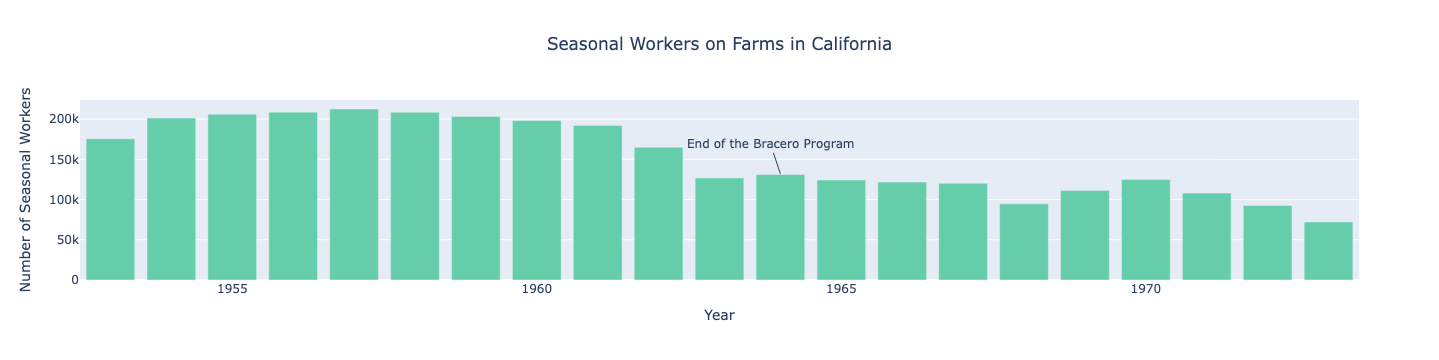

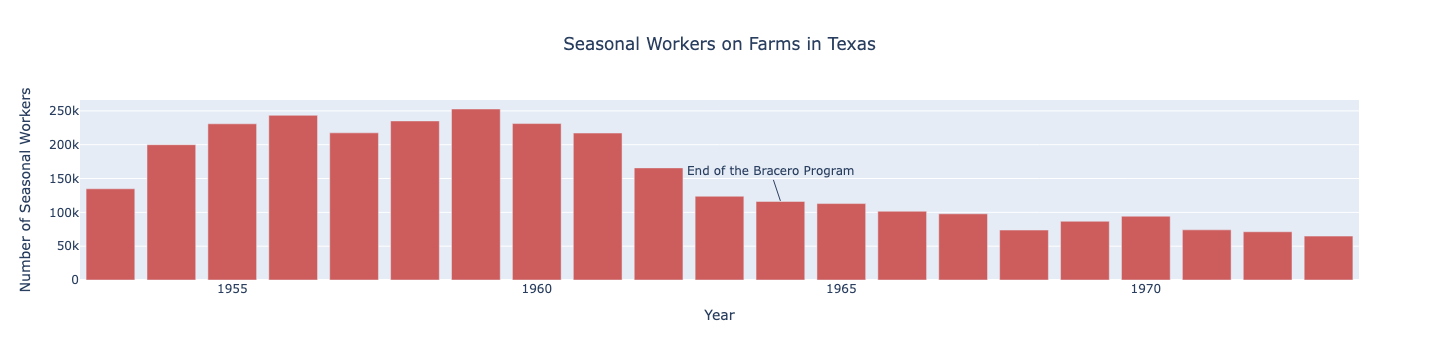

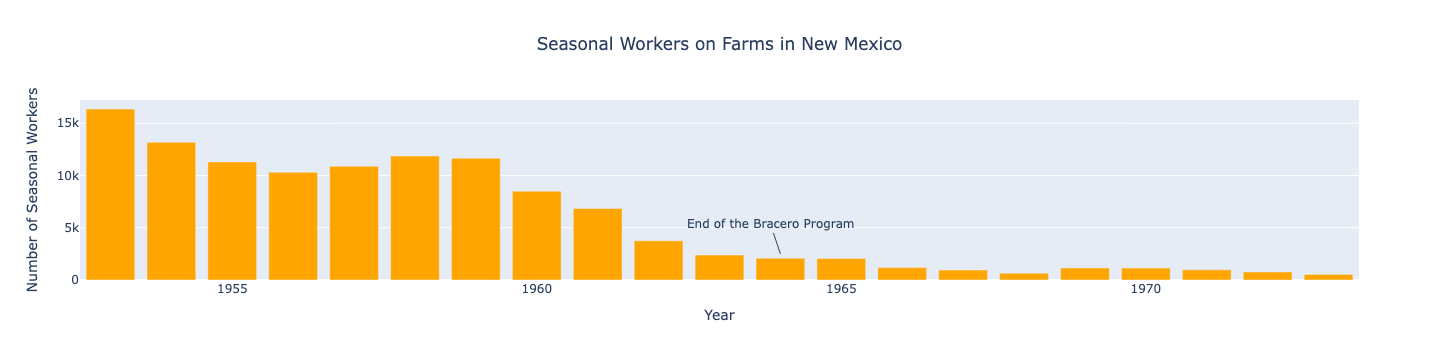

In [245]:
#california
cafilter = seasonal_year['State'] == 'CA'
caseasonal = seasonal_year[cafilter]
caseasonalfig = px.bar(caseasonal, x='Year', y='TotalHiredSeasonal', title='Seasonal Workers on Farms in California', 
                     labels={'TotalHiredSeasonal': 'Number of Seasonal Workers'})
caseasonalfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
caseasonalfig.add_annotation(x=1964, y=132000, text='End of the Bracero Program', showarrow=True)
caseasonalfig.update_traces(marker_color='mediumaquamarine')
caseasonalfig.show()

#texas
txfilter = seasonal_year['State'] == 'TX'
txseasonal = seasonal_year[txfilter]
txseasonalfig = px.bar(txseasonal, x='Year', y='TotalHiredSeasonal', title='Seasonal Workers on Farms in Texas', 
                     labels={'TotalHiredSeasonal': 'Number of Seasonal Workers'})
txseasonalfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
txseasonalfig.add_annotation(x=1964, y=117000, text='End of the Bracero Program', showarrow=True)
txseasonalfig.update_traces(marker_color='indianred')
txseasonalfig.show()

#new mexico
nmfilter = seasonal_year['State'] == 'NM'
nmseasonal = seasonal_year[nmfilter]
nmseasonalfig = px.bar(nmseasonal, x='Year', y='TotalHiredSeasonal', title='Seasonal Workers on Farms in New Mexico', 
                     labels={'TotalHiredSeasonal': 'Number of Seasonal Workers'})
nmseasonalfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
nmseasonalfig.add_annotation(x=1964, y=2500, text='End of the Bracero Program', showarrow=True)
nmseasonalfig.update_traces(marker_color='orange')
nmseasonalfig.show()

This drop before the end of the Bracero Program can even be seen when looking only at the number of contracted Bracero Workers. Like with seasonal workers, the decline in Bracero workers started in around 1960. This could therefore explain why there was not a sharp drop in seasonal workers at the end of the Bracero Program, as the decrease in labor supply may not have been as sudden as works like the Clemens study imply.

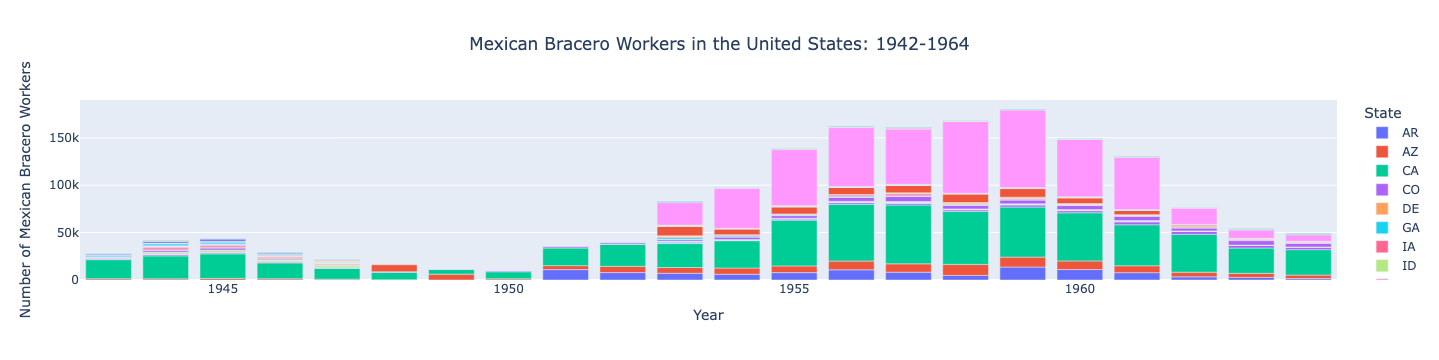

In [145]:
mexican_df = farmworkers_df[farmworkers_df['Mexican'].notna()]
mexican_df = mexican_df[mexican_df['Mexican'] > 0.0]
mexican_df = mexican_df[mexican_df['Year'] < 1965]
mexican_total = mexican_df.groupby(['State', 'Year'])['Mexican'].mean().reset_index()

bracerofig = px.bar(mexican_total, x='Year', y='Mexican', color='State', title='Mexican Bracero Workers in the United States: 1942-1964',
                   labels={'Mexican': 'Number of Mexican Bracero Workers'})
bracerofig.update_layout(title={'x':0.5, 'xanchor': 'center'})
bracerofig.show()

**NOTE THAT YOU CAN CLICK ON INDIVIDUAL STATES IN THE GRAPH TO NARROW THE GEOGRAPHIC SCOPE**

There are many potential explanations for this decline happening before the end of the Bracero Program. For instance, farm owners may have already been trying to prepare for the eventual end of the Bracero Program before 1964, as sentiment in the public and the government by 1960 indicated that the program would not last forever. Braceros themselves may have even stopped participating in the program because of the common mistreatment and discrimination towards Braceros as outlined in by both Mireya Loza and Ronald Mize in their 2016 books. It is also possible that the decline occurred independently from the Bracero Program, with farm owners needing less work due to technological innovations. While both San Shmuel in 2021 and Clemens et. al imply that this transition to technology happened as a result of ending the Bracero Program, Clemens et. al does acknowledge that the technology did exist long before the end of the program. Either way, this data reveals that drastic declines in farmworkers started before the intentional attempt to create labor scarcity through ending the Bracero Program.

This, however, still does not address whether ending the Bracero Program benefited domestic workers, who were the workers providing seasonal labor for farms that were from the United States. It is possible, for instance, that the number of seasonal workers did not drastically decline at the end of the Bracero Program because farm owners decided to replace Bracero work with domestic work. However, the following analysis shows this not to be the case.

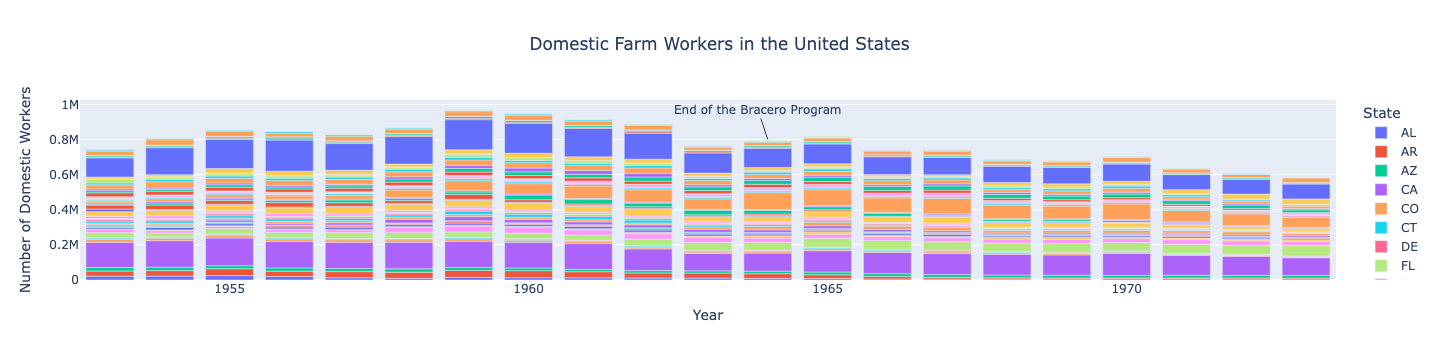

In [152]:
##Only use relevant date ranges
domestic_df = farmworkers_df[farmworkers_df['Year'] >= 1953]
domestic_df = domestic_df[domestic_df['Year'] <= 1973]

## In the data, there were 3 categories of workers that represented domestic labor: Local, Interstate, and Intrastate.
domestic_df = domestic_df.groupby(['State', 'Year'])[['Local', 'Interstate', 'Intrastate']].mean().reset_index()

##These three categories can be combined for the total domestic farmworkers
domestic_df['TotalDomestic'] = domestic_df['Local']+domestic_df['Interstate']+domestic_df['Intrastate']

domesticfig = px.bar(domestic_df, x='Year', y='TotalDomestic', color='State', title='Domestic Farm Workers in the United States',
                    labels={'TotalDomestic': 'Number of Domestic Workers'})
domesticfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
domesticfig.add_annotation(x=1964, y=800000, text='End of the Bracero Program', showarrow=True)
domesticfig.show()

In this analysis, the decline in domestic farmworkers follows a similar pattern to the other categories, beginning a gradual decline around 1960. However, after 1965 the number of domestic farmers in the United States remained relatively stable compared to the gradual declines that continued for hired and seasonal workers. This may indicate that ending the Bracero Program helped domestic workers not feel as much of the impact of the overall decline in farmworkers due to changed technologies and practices.

Additionally, a national overview again does not address the disparity in states and their participation in the Bracero Program. In the figures below, one can see that there was a slight increase in domestic farm workers in California after ending the Bracero Program. However, this increase in around 15,000 domestic workers does not totally account for the loss of around 26,000 Bracero Workers as indicated by the Bracero graph. Therefore, it is possible the loss of Braceros increased local hiring, but not to the extent that it fully replaced Bracero work. On the other hand, in Texas there was no increase in domestic farmworkers after ending the Bracero Program, showing that California cannot represent an overall improvement in hiring domestic workers after the end of the Bracero Program.

The graph of Florida also complicates this conclusion, as Florida was one the states that, according to this dataset, did not have any Bracero workers. However, their hiring of domestic workers increased just before ending the Bracero program and showed a similar pattern to California after the end of the program. Therefore, one cannot confidently conclude that the end of the Bracero Program was the cause of an increase in domestic hiring in California because a similar phenomenon occurred in a state without Bracero workers.

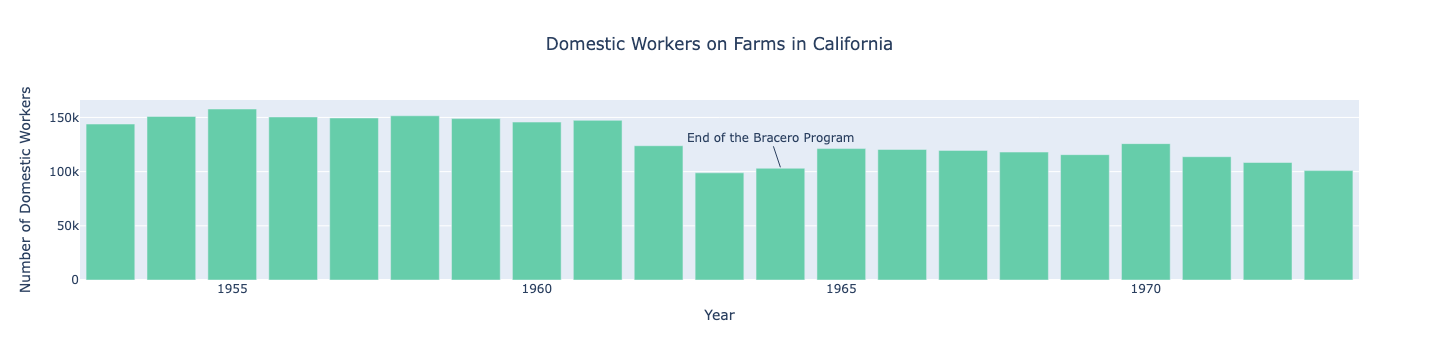

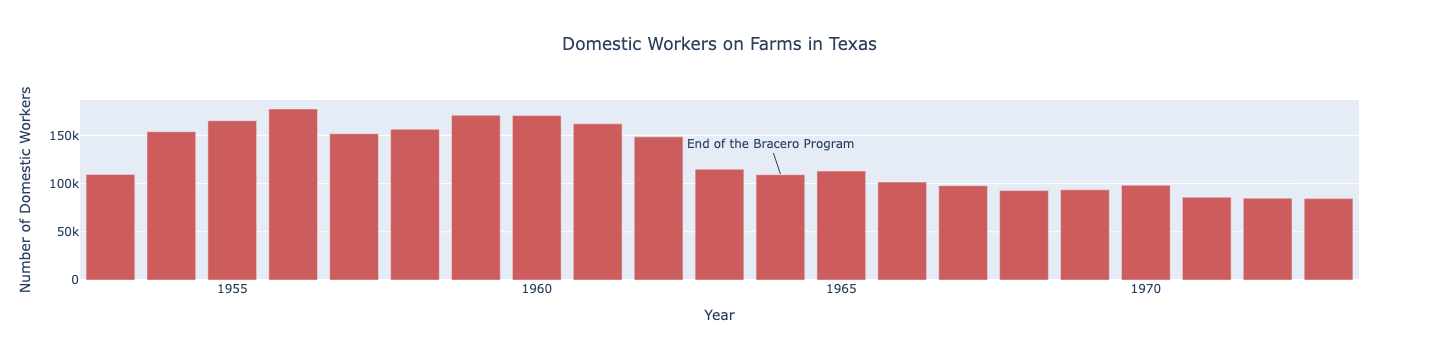

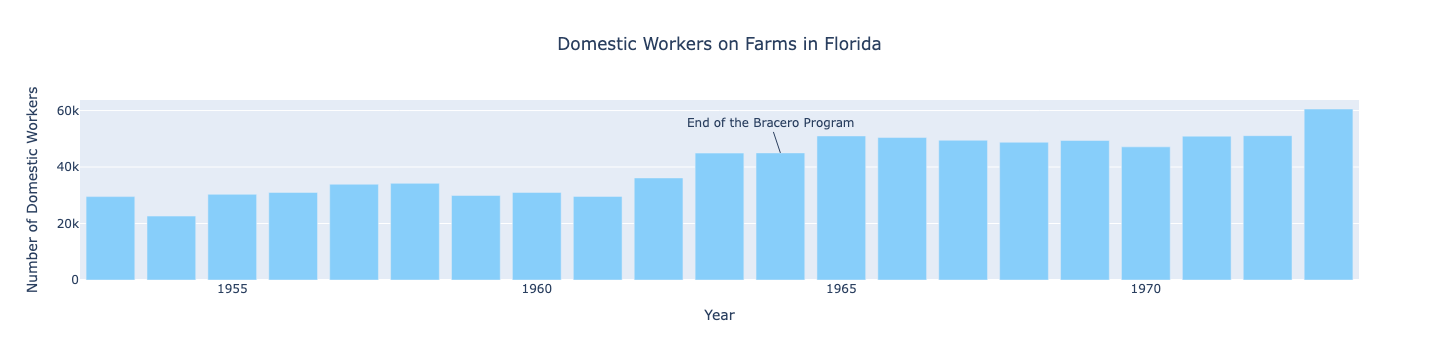

In [259]:
#california
cafilter = domestic_df['State'] == 'CA'
cadomestic = domestic_df[cafilter]
cadomesticfig = px.bar(cadomestic, x='Year', y='TotalDomestic', title='Domestic Workers on Farms in California', 
                     labels={'TotalDomestic': 'Number of Domestic Workers'})
cadomesticfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
cadomesticfig.add_annotation(x=1964, y=104000, text='End of the Bracero Program', showarrow=True)
cadomesticfig.update_traces(marker_color='mediumaquamarine')
cadomesticfig.show()

#florida
txfilter = domestic_df['State'] == 'TX'
txdomestic = domestic_df[txfilter]
txdomesticfig = px.bar(txdomestic, x='Year', y='TotalDomestic', title='Domestic Workers on Farms in Texas', 
                     labels={'TotalDomestic': 'Number of Domestic Workers'})
txdomesticfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
txdomesticfig.add_annotation(x=1964, y=110000, text='End of the Bracero Program', showarrow=True)
txdomesticfig.update_traces(marker_color='indianred')
txdomesticfig.show()

#florida
flfilter = domestic_df['State'] == 'FL'
fldomestic = domestic_df[flfilter]
fldomesticfig = px.bar(fldomestic, x='Year', y='TotalDomestic', title='Domestic Workers on Farms in Florida', 
                     labels={'TotalDomestic': 'Number of Domestic Workers'})
fldomesticfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
fldomesticfig.add_annotation(x=1964, y=45000, text='End of the Bracero Program', showarrow=True)
fldomesticfig.update_traces(marker_color='lightskyblue')
fldomesticfig.show()

### Unauthorized Mexican Immigration

The analysis of the previous data does not take into account unauthorized Mexican immigration. Scholars generally agree that the Bracero Program, while providing a legal way for Mexicans to work, simultaneously increased the number of unauthorized Mexican immigrants working in the United States. This system flourished because it was often easier for both the Mexican workers and farm owners, as Mexican workers did not have to go through the tedious process of screening and documentation (that often required bribes) and farm owners  did not have to provide the required housing, food, and transportation for workers not under Bracero contracts. This in turn created a pathway for unauthorized immigration that continued long after ending the Bracero Program in 1964.

As mentioned before, evidence for this increase in unauthorized Mexican immigration has been connected to the number of official apprehensions of these unauthorized immigrants.

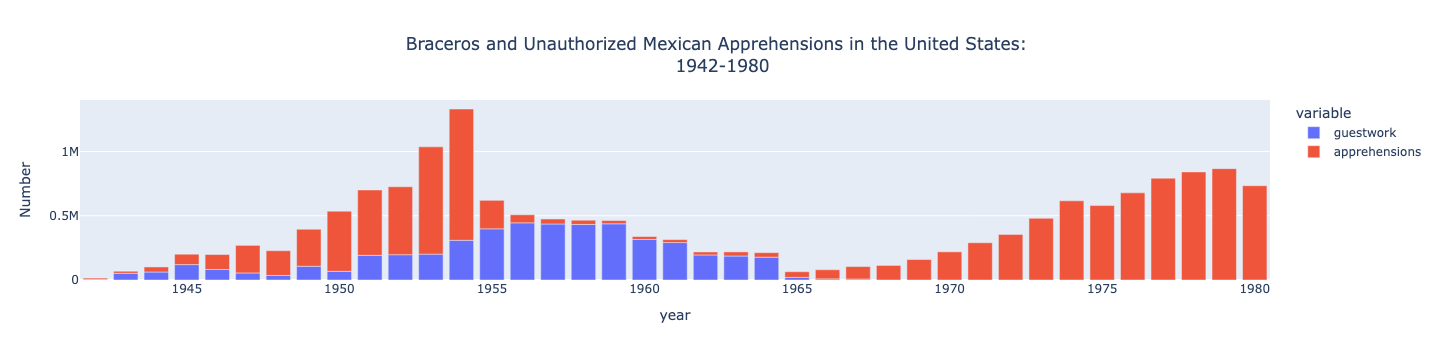

In [173]:
apprehension_df = pd.read_csv('../data/original/total_braceros_by_year.tab', sep='\t')

apprehensionfig = px.bar(apprehension_df, x='year', y=['guestwork','apprehensions'], title='Braceros and Unauthorized Mexican Apprehensions in the United States: <br> 1942-1980',
                        labels={'value': 'Number'})
apprehensionfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
apprehensionfig.show()

Considering apprehensions as indicative of the number of unauthorized Mexican immigrants in the United States, one could interpret a drastic increase in unauthorized Mexican immigration associated with the development of the Bracero Program and the number of unauthorized immigrants increasing after the end of the Bracero Program. However, changes in apprehension data is more indicative of the changes in effort the United States government was putting into seizing unauthorized immigrants, rather than the changes in the numbers of unauthorized immigrants. Yes, more unauthorized immigrants would provide more opportunities for them to be apprehended, but such data should be looked at cautiously. For instance, the drastic spike in apprehensions in the early 1950s corresponds with increasing public and government concern in the United States regarding unauthorized immigrantion from Mexico. This concern resulted in more resources put towards apprehensions, culminating in "Operation Wetback" in 1954 as a largescale deportation effort. 

This shows the particular difficulty in measuring unauthorized immigration, as unauthorized immigrants would not willingly reveal themselves to be counted as unauthorized because this would likely result in their deportation. In the same vein, this would not be included in the statistics for the United States Department of Agriculture without the government working to take action against specific farms to remedy the unlawful practices. In fact, Clemens et. al even acknowledged that their foreign workers category only included those who had legally entered the United States. Therefore, there is no way to truly know the number of unauthorized Mexican immigrants working on farms during this time period. 

Similarly, using numbers, one cannot determine the extent to which farm owners replaced Bracero workers with unauthorized immigrants at the end of the Bracero Program. The minimal benefits for domestic workers in ending the Bracero Program therefore could be explained by the possibility that farm owners replaced Bracero workers with unauthorized immigrants instead of domestic workers. In this sense, there is also the possibility that the decline in farmworkers shown in the data connects to reluctance of farm owners to accurately report their unauthorized workers when reporting data. Therefore, while innovations in agricultural technology undoubtedly caused shifts in farming, the variable of unauthorized Mexican immigrants and lack of clarity surrounding its counting makes conclusions more difficult to determine.

Clemens et. al did address the idea of unauthorized Mexican immigrants replacing labor as an explanation, though they concluded that this was unlikely the case using minimal rise in number of apprehensions to defend their case. They also explained that "there is no evidence of any stand-down in enforcement effort in the years just before or after 1965 that would allow minimal apprehensions to coincide with massive new illegal flows" (1473). This certainly supports the idea of the increase in adopting new technologies, but again, Clemens et. al did not address the decrease in Mexican Bracero workers and farmworkers in general before the ending of the program. Therefore, the drop in labor supply was not as drastic as implied by their study. A more nuanced analysis therefore acknowledges the variety of adjustments that may have been made as a result of ending the Bracero Program - including hiring some more domestic workers, continuing to rely on unauthorized workers, and increasing mechanization - rather than the narrow conclusion the Clemens study made with respect to the focus on mechanization.

### Further Data Caveats

It is important to note further inconsistencies in the data that may impact the reading of these visualizations. As mentioned earlier, there was a wide variety in the consistency of data reporting for each state. This is most easily visualized through the data regarding Braceros working in Texas.

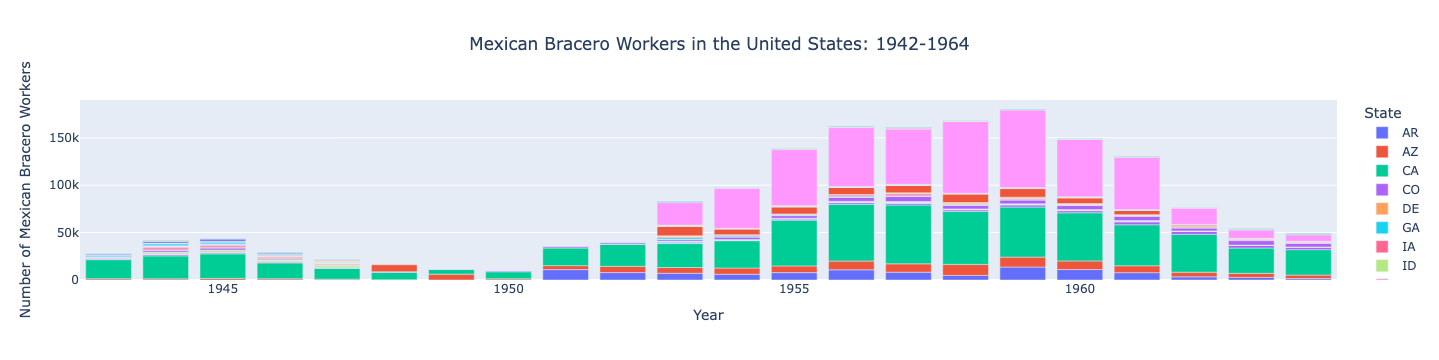

In [177]:
bracerofig.show()

As one can tell from the pink bars, Texas often had the most Bracero workers of any state, its numbers only in competition with those in California. However, there is no data for the Bracero workers in Texas until 1953, likely making the early parts of the graph skewed to show fewer Bracero workers. While Mexico actually insisted on excluding Texas from the Bracero program until 1947 because of Texans' particularly racist attitudes and actions towards Mexicans, this does not account for the lack of data from 1947 until 1953. (In Texas' initial years of exclusion from the program, they also relied on unauthorized immigrants to work on farms, something not shown in the data.)

While the reported data for the Bracero workers showed the most inconsistencies, with the other data categories, there are many states that do not have data for all of the years shown. For instance, with the domestic data, there are years where West Virginia (and likely others) do not have any data whatsoever. This indicates potential inconsistencies in reporting, something that not only skews the final data and appearance of graphs but also brings up questions regarding the validity of the numbers that *were* collected. **You can click on the West Virginia (WV) square in the key to see the state individually and do that with other states as well.**

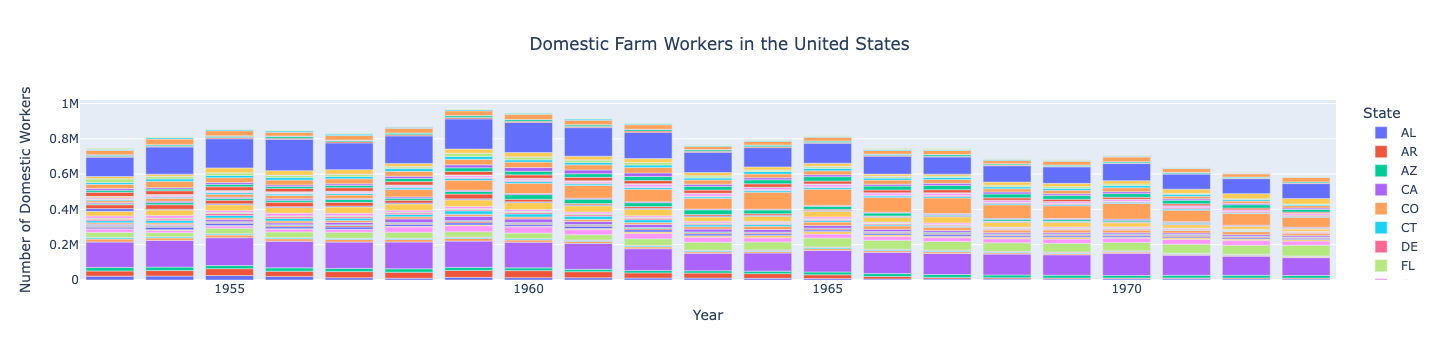

In [183]:
#redoing the code without annotation of end of bracero program because that skews when you click indidvidually
domesticfig = px.bar(domestic_df, x='Year', y='TotalDomestic', color='State', title='Domestic Farm Workers in the United States',
                    labels={'TotalDomestic': 'Number of Domestic Workers'})
domesticfig.update_layout(title={'x':0.5, 'xanchor': 'center'})
domesticfig.show()

In this analysis, I also decided not to include analysis of the category of foreign workers on farms because of questions regarding its reliability. First of all, I was initially skeptical of the additional information this would provide considering it only considered "legal" foreigners. Also, it was unclear how the data was calculated, considering the category of, for instance, Jamaican workers only lasted from 1943-1947 despite the large range of the foreign workers category. Finally, the foreign workers reported was often *less* than the reported Bracero workers (*see the chart below, where the "NotBracero" column was occasionally negative*), which causes confusion with the data because Bracero workers should inherently be considered foreign workers. 

In [188]:
#create dataframes of the sums of braceros and foreign workers by year
foreign_by_year = farmworkers_df.groupby('Year')['TotalForeign'].sum().reset_index()
bracero_by_year = farmworkers_df.groupby('Year')['Mexican'].sum().reset_index()

#combine the two dataframs into one
foreign_by_year['Mexican'] = bracero_by_year['Mexican']

#add a column that compares the foreign column with bracero column
foreign_by_year['NotBracero'] = foreign_by_year['TotalForeign'] - foreign_by_year['Mexican']

foreign_by_year

,Year,TotalForeign,Mexican,NotBracero
0,1942,0.0,0.0,0.0
1,1943,0.0,218183.0,-218183.0
2,1944,0.0,453396.0,-453396.0
3,1945,1122743.0,466255.0,656488.0
4,1946,518769.0,340678.0,178091.0
5,1947,329131.0,231378.0,97753.0
6,1948,6632.0,105977.0,-99345.0
7,1949,0.0,64968.0,-64968.0
8,1950,0.0,106024.0,-106024.0
9,1951,20947.0,345832.0,-324885.0


One can also clearly see a lack of consistency of reporting by state in the foreign workers category, as there is not only a gap in the years Clemens et. al acknowledges as a gap (between 1948-1950) but the number of foreign worker drastically drops off after the end of the Bracero program. Clicking on many individual states, like Arizona or Colorado, will reveal no data after 1964. It is therefore misleading that Clemens et. al considers that Bracero workers were not significantly replaced by foreign workers because there is very little data with which to calculate a potential replacement.

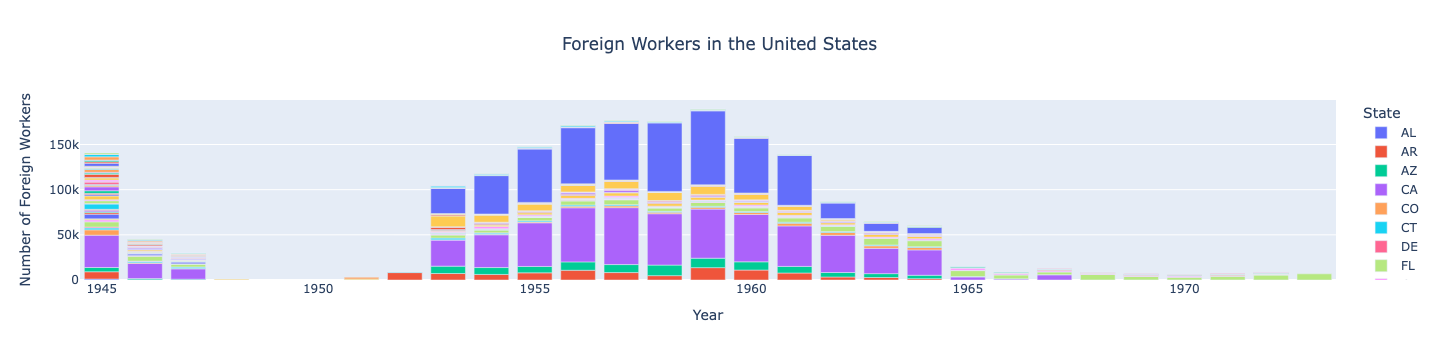

In [193]:
foreign = farmworkers_df[farmworkers_df['TotalForeign'].notna()]
foreign = foreign[foreign['TotalForeign'] > 0.0]

foreign = foreign.groupby(['State', 'Year'])['TotalForeign'].mean().reset_index()

foreignfig = px.bar(foreign, x='Year', y='TotalForeign', color='State', title='Foreign Workers in the United States',
                   labels={'TotalForeign': 'Number of Foreign Workers'})
foreignfig.update_layout(title={'x':0.5, 'xanchor': 'center'})

## Conclusion

While those ending the Bracero Program expressed goals to benefit the domestic workforce, this data shows little, if any, increase in the domestic workforce at the end of the program. In fact, an overall decline in farmworkers began in the years before ending the Bracero program, indicating other factors at play impacting farmworkers outside of the Bracero Program. Whether this is explained through technological innovations, unauthorized immigration, or other unrelated factors, this reveals the multifaceted nature of something like a labor force. While the United States government attempted to influence domestic labor through ending the Bracero Program, the number of influences on this industry meant they could not isolate changes to any single cause. 

Revealing the multifaceted nature of something like a labor force also reveals the limitations in the Clemens et. al economic study where this data originated, a study which calculated its conclusions to show the importance of adopting new technologies to make up for the changes imposed by ending the Bracero Program. The study narrowed its conclusions to a single effect, mitigating complexity, and also did not address the nuances of the declining farm workforce before ending the Bracero Program. In this sense, while one can use the data to notice trends in certain statistics, there is no way to determine causes or effects of these trends without looking into further contexts and acknowledging coexisting factors to help explain them. Not only that, but the data was less definitive than the Clemens study made it seem. The study referred to the data as a "complete database," something exploration reveals as misleading. One cannot expect historical data to reveal a complete database, and while this does not mean that people should not use the data, it also calls for exploring additional sources to complete the story. In this case, one may want to look at potential documents like solicitations for farmworkers, historical accounts from farm owners and farmworkers, or even newspaper descriptions that could corroborate or even add nuance and complexity to the data the numbers reveal.

## Github Repository

You can access the Github Repository for this project here: https://github.com/kyliefmiller/research-project

## Bibliography

Data from the Harvard Dataverse: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/17M4ZP

- Cardenas, Gilberto. “US Immigration Policy Towards Mexico: An Historical Perspective.” *Chicano Law Review* 2 (Summer 1975): 66-91.
- Clemens, Michael A., Ethan G. Lewis, and Hannah M. Postel. “Immigration Restrictions as Active Labor Market Policy: Evidence from the Mexican Bracero Exclusion.” *American Economic Review* 108, no. 6 (2018): 1468-1487.
- Cohen, Deborah. *Braceros: Migrant Citizens and Transnational Subjects in the Postwar United States and Mexico.* Chapel Hill: University of North Carolina Press, 2011. 
- Craig, Richard B. *The Bracero Program: Interest Groups and Foreign Policy.* Austin: University of Texas Press, 1971. 
- García y Griego, Manuel. *The Importation of Mexican Contract Laborers to the United States, 1942-1964 : Antecedents, Operation, and Legacy.* La Jolla, California: Program in United States-Mexican, University of California, San Diego, 1981.
- Loza, Mireya. *Defiant Braceros: How Migrant Workers Fought for Racial, Sexual, and Political Freedom.* Chapel Hill: University of North Carolina Press, 2016.
- Mandeel, Elizabeth W. “The Bracero Program 1942-1964.” *American International Journal of Contemporary Research* 4, no. 1 (2014): 171-184.
- Martin, Philip. “Mexican Braceros and US Farm Workers.” *Farm Labor and Rural Migration News* (blog). *Wilson Center,* July 10, 2020. https://www.wilsoncenter.org/article/mexican-braceros-and-us-farm-workers
- Mize, Ronald. *The Invisible Workers of the U.S.-Mexico Bracero Program: Obreros Olvidados.* Lanham: Lexington Books, 2016.
- San, Shmuel. “Labor Supply and Directed Technical Change: Evidence from the Termination of the Bracero Program in 1964.” *American Economic Journal: Applied Economics* 15, no. 1 (2023): 136-163.